# Regression models
1. linear regression
2. polynomial regression
3. logistic regression


# LINEAR REGRESSION

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
x = df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['sepal length (cm)']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error: ",mse)
print(f"R-scored :",r2)

mean squared error:  0.10212647866320387
R-scored : 0.8520477902310163


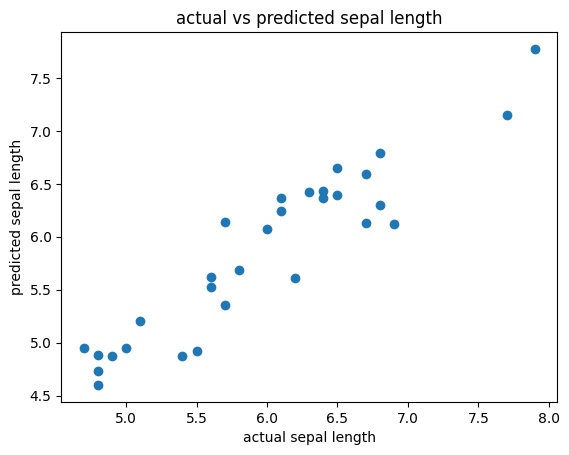

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual sepal length")
plt.ylabel("predicted sepal length")
plt.title("actual vs predicted sepal length")
plt.show()

# POLYNOMIAL REGRESSION

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [17]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

y_pred = model.predict(x_test_poly)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error: ",mse)
print(f"R-scored :",r2)

mean squared error:  0.10527870582313459
R-scored : 0.8474811099722794


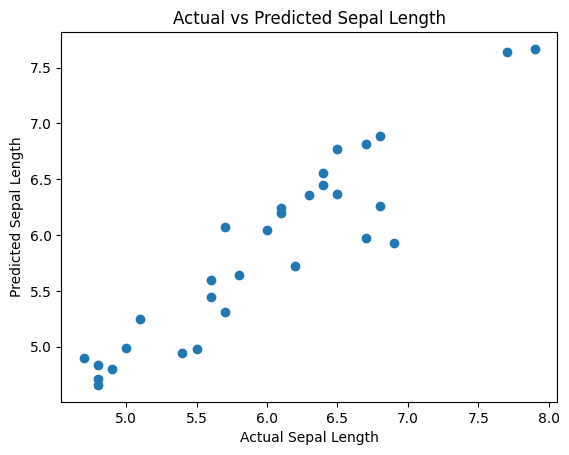

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sepal Length")
plt.ylabel("Predicted Sepal Length")
plt.title("Actual vs Predicted Sepal Length")
plt.show()

#LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
df['target'] = df['target'].apply(lambda x: 1 if x == 0 else 0)

In [26]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: ",accuracy)
print(f"Confusion Matrix:\n", conf_matrix)

Accuracy:  1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]
